<a href="https://colab.research.google.com/github/Pranov1984/Plant-Species-Classification/blob/main/Plant_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Case Study: Plant Species Classifier</h1>
Dataset (https://www.kaggle.com/c/plant-seedlings-classification/data) 

*Make sure you activate Hardware accelerator in the settings. 
Go to Runtime --> Change runtime type --> Set Hardware Accelerator to GPU*

In [1]:
%tensorflow_version 2.x

**Mounting Google Drive on to the Google Colab instance**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New section

**Set the appropriate path for the datsaet zip provided**

In [2]:
train_path = "/content/drive/MyDrive/Colab Notebooks/AIML Mentoring Docs/Week 3 - CV & Transfer Learning Project/train"
project_path = '/content/drive/MyDrive/Colab Notebooks/AIML Mentoring Docs/Week 3 - CV & Transfer Learning Project/'
import numpy as np


What are the folder names which constitute the data (plants) for training

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [4]:
os.listdir(train_path)

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

## How many classes are present for classification 

In [5]:
len(os.listdir(train_path))

12

How many images are present within each sub folder in training folder

In [6]:
len(os.listdir(train_path +'/'+'Sugar beet'))

385

In [7]:
# Define the directory paths for the train, test

train_dir = os.listdir(train_path)
train_dir

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

### Number of images in each Train Subfolder

In [8]:
c=0
for f in train_dir:
    print("Total training  images of flower type {fname} is: {count}"
          .format(fname = f, count = len(os.listdir(train_path+'/'+f))))
    c=c+len(os.listdir(train_path+'/'+f))

print("Total Number of Images:", c)

Total training  images of flower type Black-grass is: 263
Total training  images of flower type Charlock is: 390
Total training  images of flower type Cleavers is: 287
Total training  images of flower type Common Chickweed is: 611
Total training  images of flower type Common wheat is: 221
Total training  images of flower type Fat Hen is: 475
Total training  images of flower type Loose Silky-bent is: 671
Total training  images of flower type Maize is: 221
Total training  images of flower type Scentless Mayweed is: 516
Total training  images of flower type Shepherds Purse is: 231
Total training  images of flower type Small-flowered Cranesbill is: 496
Total training  images of flower type Sugar beet is: 385
Total Number of Images: 4767


## Print some of the image names in each of the train and test folders


In [9]:
for f in train_dir:
    print("Five train  image names of plant type {fname} is: {img_name} "
          .format(fname = f, img_name = os.listdir(train_path+'/'+f)[0:5]))

Five train  image names of plant type Black-grass is: ['0050f38b3.png', '05eedce4d.png', '0260cffa8.png', '0183fdf68.png', '075d004bc.png'] 
Five train  image names of plant type Charlock is: ['0cf0581b1.png', '0d5f555a3.png', '09f038ce4.png', '08fcc43a7.png', '04142acb9.png'] 
Five train  image names of plant type Cleavers is: ['09da4f213.png', '0515bc601.png', '01605ed73.png', '005b4a3e3.png', '0756fd41e.png'] 
Five train  image names of plant type Common Chickweed is: ['10a42d01f.png', '19a44418c.png', '0cc84e7b2.png', '036eca712.png', '16b1530ce.png'] 
Five train  image names of plant type Common wheat is: ['0a4a26651.png', '01a2ae45e.png', '0ec23ca76.png', '0382d0faf.png', '096ec46ec.png'] 
Five train  image names of plant type Fat Hen is: ['1797f5460.png', '066395555.png', '0a1480ed8.png', '01437202b.png', '07636139b.png'] 
Five train  image names of plant type Loose Silky-bent is: ['0012f11c4.png', '006eac3d9.png', '009d8d799.png', '0140dfc02.png', '00442de98.png'] 
Five train  

In [10]:
train_path, train_dir

('/content/drive/MyDrive/Colab Notebooks/AIML Mentoring Docs/Week 3 - CV & Transfer Learning Project/train',
 ['Black-grass',
  'Charlock',
  'Cleavers',
  'Common Chickweed',
  'Common wheat',
  'Fat Hen',
  'Loose Silky-bent',
  'Maize',
  'Scentless Mayweed',
  'Shepherds Purse',
  'Small-flowered Cranesbill',
  'Sugar beet'])

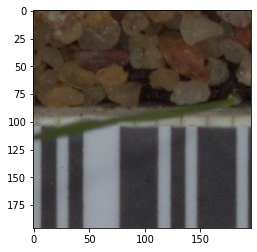

In [11]:
from skimage import data, io
import matplotlib.pyplot as plt


img = io.imread(os.path.join(train_path+'/'+'Black-grass'+'/'+'0050f38b3.png'))
plt.imshow(img)
plt.show()

In [12]:
img.shape

(196, 196, 3)

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 10x4 configuration
nrows = 12
ncols = 4

# Index for iterating over images
pic_index = 0

In [14]:
os.listdir(train_path)[0], train_path

('Black-grass',
 '/content/drive/MyDrive/Colab Notebooks/AIML Mentoring Docs/Week 3 - CV & Transfer Learning Project/train')

In [15]:
n0 = os.listdir(train_path)[0]
n1 = os.listdir(train_path)[1]
n2 = os.listdir(train_path)[2]
n3 = os.listdir(train_path)[3]
n4 = os.listdir(train_path)[4]
n5 = os.listdir(train_path)[5]
n6 = os.listdir(train_path)[6]
n7 = os.listdir(train_path)[7]
n8 = os.listdir(train_path)[8]
n9 = os.listdir(train_path)[9]
n10 = os.listdir(train_path)[10]
n11 = os.listdir(train_path)[11]

In [16]:
os.path.join(train_path+'/'+n0)
#os.listdir(train_path+'/'+n0)

'/content/drive/MyDrive/Colab Notebooks/AIML Mentoring Docs/Week 3 - CV & Transfer Learning Project/train/Black-grass'

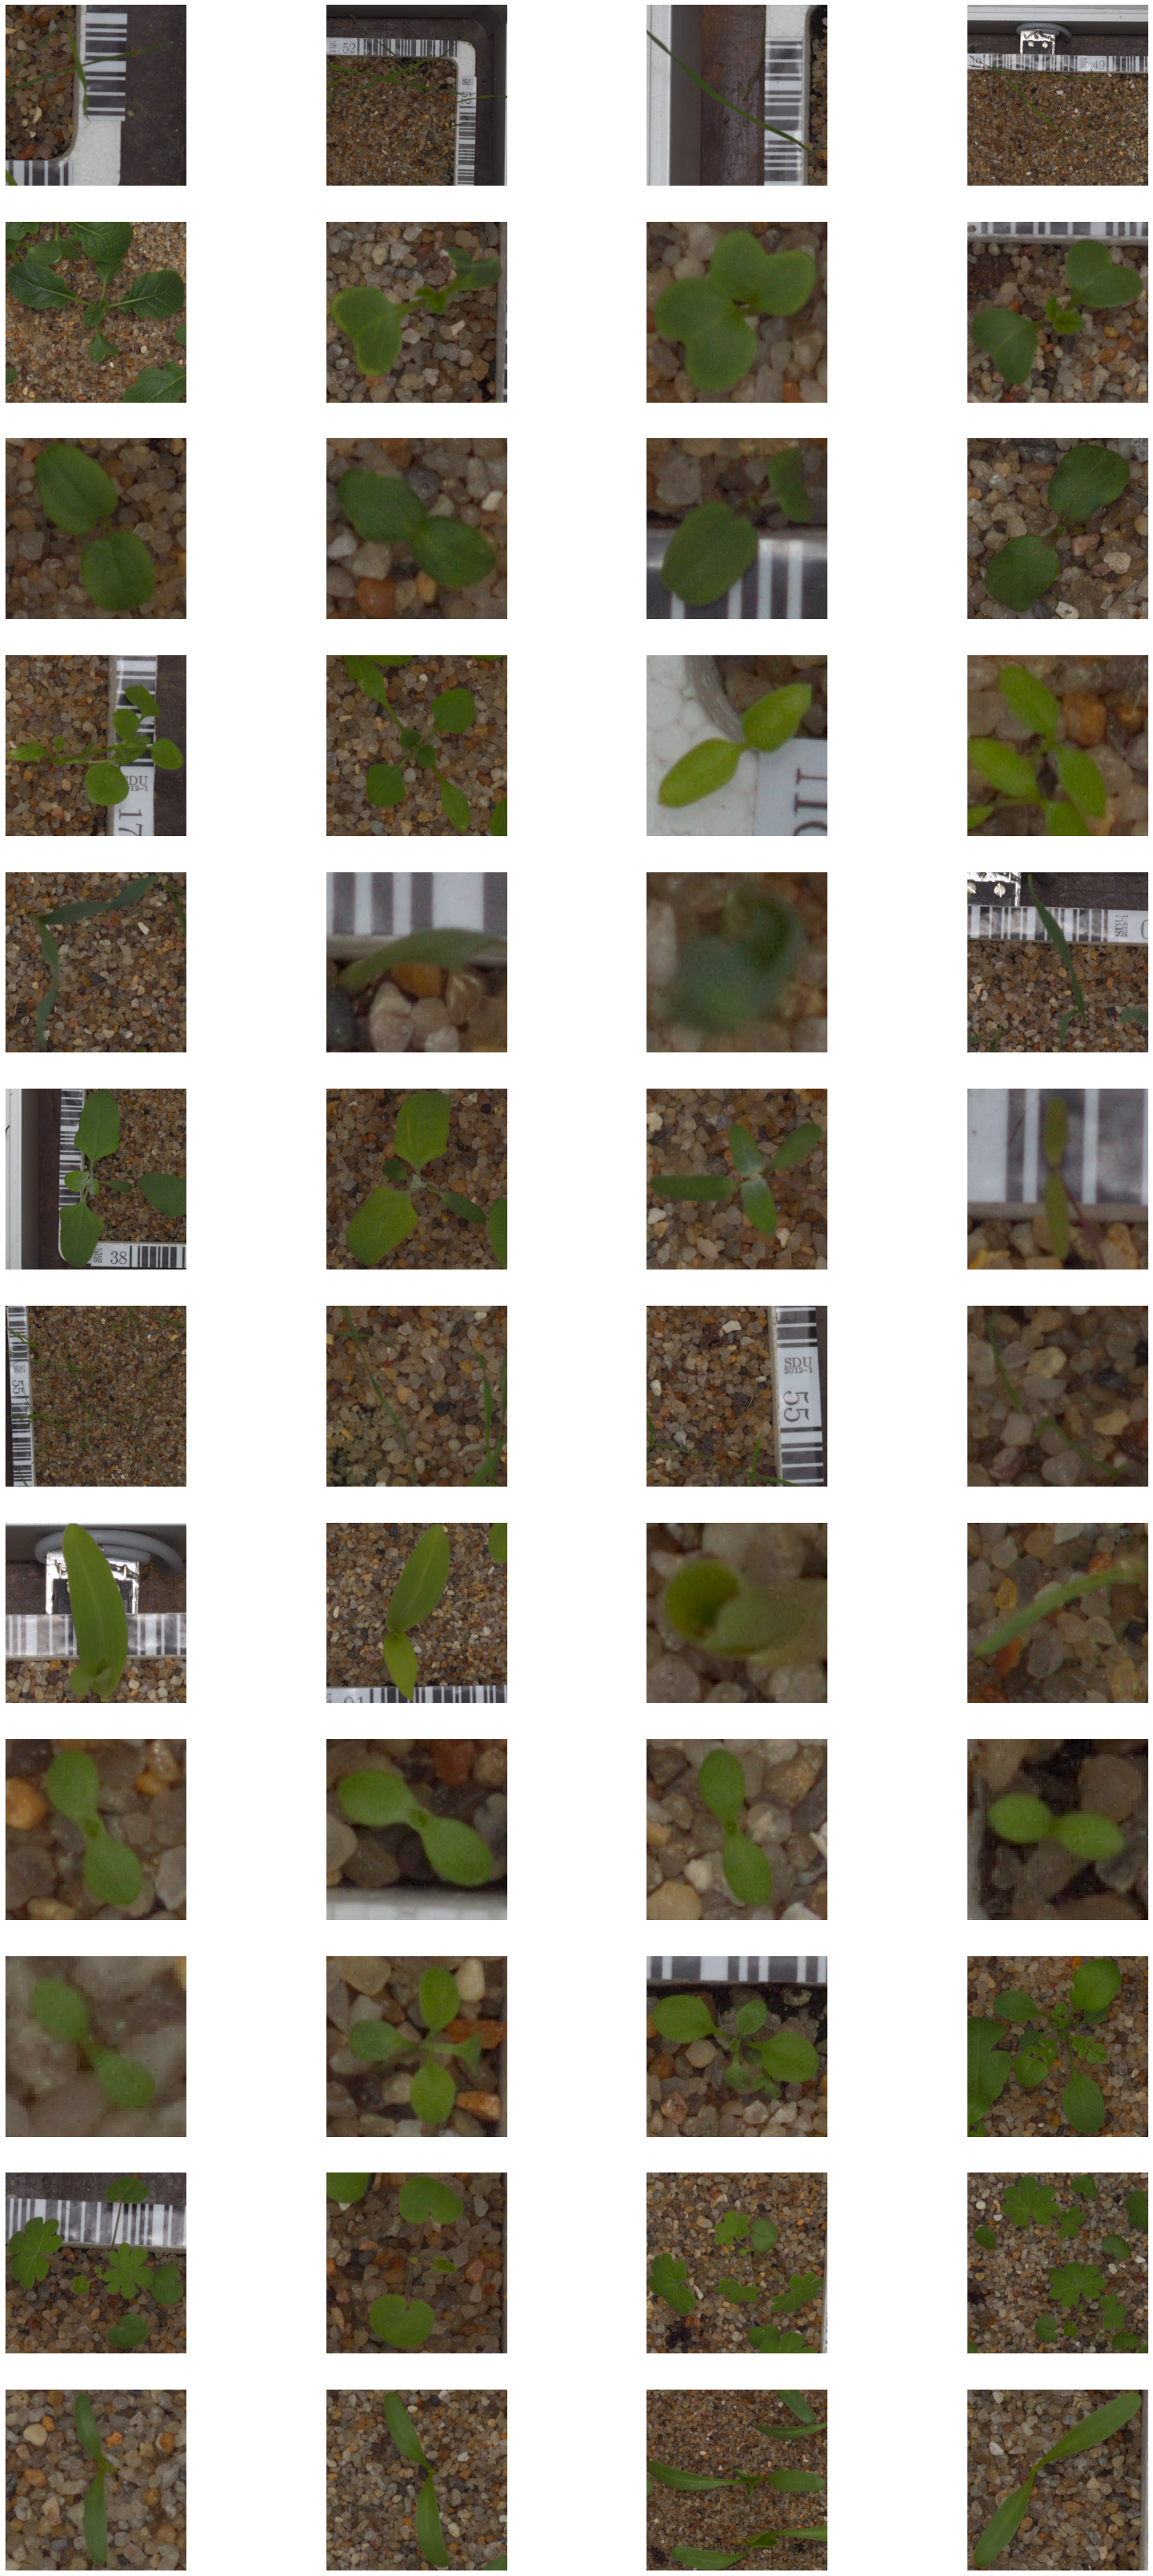

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 7, nrows * 5)

pic_index += 5
next_n0_pix = [os.path.join(train_path+'/'+n0, fname) 
                for fname in os.listdir(train_path+'/'+n0)[pic_index-4:pic_index]]
next_n1_pix = [os.path.join(train_path+'/'+n1, fname) 
                for fname in os.listdir(train_path+'/'+n1)[pic_index-4:pic_index]]
next_n2_pix = [os.path.join(train_path+'/'+n2, fname) 
                for fname in os.listdir(train_path+'/'+n2)[pic_index-4:pic_index]]
next_n3_pix = [os.path.join(train_path+'/'+n3, fname) 
                for fname in os.listdir(train_path+'/'+n3)[pic_index-4:pic_index]]
next_n4_pix = [os.path.join(train_path+'/'+n4, fname) 
                for fname in os.listdir(train_path+'/'+n4)[pic_index-4:pic_index]]
next_n5_pix = [os.path.join(train_path+'/'+n5, fname) 
                for fname in os.listdir(train_path+'/'+n5)[pic_index-4:pic_index]]
next_n6_pix = [os.path.join(train_path+'/'+n6, fname) 
                for fname in os.listdir(train_path+'/'+n6)[pic_index-4:pic_index]]
next_n7_pix = [os.path.join(train_path+'/'+n7, fname) 
                for fname in os.listdir(train_path+'/'+n7)[pic_index-4:pic_index]]
next_n8_pix = [os.path.join(train_path+'/'+n8, fname) 
                for fname in os.listdir(train_path+'/'+n8)[pic_index-4:pic_index]]
next_n9_pix = [os.path.join(train_path+'/'+n9, fname) 
                for fname in os.listdir(train_path+'/'+n9)[pic_index-4:pic_index]]

next_n10_pix = [os.path.join(train_path+'/'+n10, fname) 
                for fname in os.listdir(train_path+'/'+n10)[pic_index-4:pic_index]]
next_n11_pix = [os.path.join(train_path+'/'+n11, fname) 
                for fname in os.listdir(train_path+'/'+n11)[pic_index-4:pic_index]]

for i, img_path in enumerate(next_n0_pix+next_n1_pix+next_n2_pix+next_n3_pix+next_n4_pix+next_n5_pix+next_n6_pix+next_n7_pix+next_n8_pix+next_n9_pix+next_n10_pix+next_n11_pix ):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Importing required Keras modules**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

<h2>Building the CNN Classifier</h2>

In [ ]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 12 neuron to predict the categorical classifcation
classifier.add(Dense(units = 12, activation = 'softmax'))

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

**Compiling the CNN classifier with Adam optimizer (default Learning rate and other parameters)
and Categorical Crossentropy as loss function and Accuracy as the metric to monitor**

*Optionally you can use an optimizer with custom learning rate and passing it to the optimizer parameter of compile*

*Eg: keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)*

In [ ]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Dataset Pre-processing**

*ImageDataGenerator is a powerful preprocessing utility to generate training and 
testing data with common data augmentation techniques. It can also be used to  
generate training data from Images stored in hierarchical directory structures
For more options of ImageDataGenerator go to https://keras.io/preprocessing/image/*

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Create data generator for training data with data augmentation and normalizing all
# values by 255
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


#test_datagen = ImageDataGenerator(rescale = 1./255)

# Setting training data generator's source directory
# Setting the target size to resize all the images to (64,64) as the model input layer expects 64X64 images

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 256,
                                                 class_mode = 'categorical')

# Setting testing data generator's source directory
#test_set = test_datagen.flow_from_directory('./flowers/test',
#                                            target_size = (64, 64),
#                                            batch_size = 32,
#                                            class_mode = 'categorical')


# There are 4767 training images in total
classifier.fit_generator(training_set,
                         steps_per_epoch = int(4767/256),
                         epochs = 10)
                         #validation_data = test_set,
                         #validation_steps = int(500/32))

Found 4767 images belonging to 12 classes.
Epoch 1/10
18/18 [==============================] - 238s 13s/step - loss: 1.7464 - accuracy: 0.3742
Epoch 2/10
18/18 [==============================] - 84s 5s/step - loss: 1.6400 - accuracy: 0.4190
Epoch 3/10
18/18 [==============================] - 84s 5s/step - loss: 1.5110 - accuracy: 0.4691
Epoch 4/10
18/18 [==============================] - 83s 5s/step - loss: 1.4186 - accuracy: 0.5017
Epoch 5/10
18/18 [==============================] - 84s 5s/step - loss: 1.2896 - accuracy: 0.5533
Epoch 6/10
18/18 [==============================] - 83s 5s/step - loss: 1.2298 - accuracy: 0.5666
Epoch 7/10
18/18 [==============================] - 83s 5s/step - loss: 1.1447 - accuracy: 0.6043
Epoch 8/10
18/18 [==============================] - 84s 5s/step - loss: 1.0932 - accuracy: 0.6121
Epoch 9/10
18/18 [==============================] - 83s 5s/step - loss: 1.0332 - accuracy: 0.6393
Epoch 10/10
18/18 [==============================] - 84s 5s/step - loss: 

**Always save the model and its weights after training**

In [17]:
project_path = '/content/drive/MyDrive/Colab Notebooks/AIML Mentoring Docs/Week 3 - CV & Transfer Learning Project/'
#classifier.save(project_path + 'classifier.h5')

#classifier.save_weights(project_path + 'classifier_weights.h5')

*Check the current directory if the weights have been saved*

In [18]:
#!ls

<h2>Let's test the model now</h2>

**Load the pre-trained saved model**

In [17]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the pre trained model from the HDF5 file saved previously
#pretrained_model = load_model(project_path + 'classifier.h5')
#pretrained_model.load_weights(project_path + 'classifier_weights.h5')

**Testing the model on the prediction image i.e image provided to classify**

In [ ]:
import cv2
test_image = cv2.imread(project_path + 'Seedling - Prediction/Predict.png')
# Resize the image to 64X64 shape to be compatible with the model
test_image = cv2.resize(test_image,(64,64))

# Check if the size of the Image array is compatible with Keras model
print(test_image.shape)

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1/255.0

#Check the size of the Image array again
print('After expand_dims: '+ str(test_image.shape))


#Predict the result of the test image
result = classifier.predict(test_image)

# Check the indices Image Data Generator has allotted to each folder
classes_dict = training_set.class_indices
print(classes_dict)

# Creating a list of classes in test set for showing the result as the folder name
prediction_class = []
for class_name,index in classes_dict.items():
  prediction_class.append(class_name)
  
print(result[0])

# Index of the class with maximum probability
predicted_index = np.argmax(result[0])

# Print the name of the class
print(prediction_class[predicted_index])

(64, 64, 3)
After expand_dims: (1, 64, 64, 3)
{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}
[2.1894336e-04 8.4921700e-01 2.1657201e-02 4.2832087e-04 1.6084888e-04
 2.2178045e-02 1.1593745e-04 5.1282555e-02 1.6676025e-02 8.0110664e-03
 1.6749976e-02 1.3303988e-02]
Charlock


**We can play around with the model by adding regularization to the layers, adding more convolutional layers, etc., to improve the testing accuracy**

### Let's attempt Transfer Learning

In [18]:
import numpy as np
import os

import time
import tensorflow as tf

from keras.applications import resnet
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image

from keras.applications.imagenet_utils import preprocess_input    ### this helps in converting our images to the dimensions of classifiers used to train imagenet images
from keras.applications.imagenet_utils import decode_predictions  ### this helps in decode predictions to human readable class
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from keras import optimizers

In [ ]:
model = VGG16()
print(model.summary())

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

## Use the model above to classify any image from the data

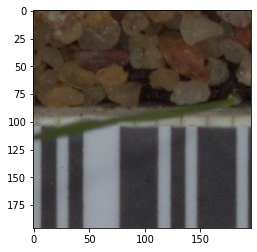

(196, 196, 3)

In [ ]:
img = io.imread(os.path.join(train_path+'/'+train_dir[0]+'/'+'0050f38b3.png'))
plt.imshow(img)
plt.show()
img.shape

# Preprocess the image dimension to the shape/dimension of input shape for vgg16 or resnet or any model that was used on image net data.

We need to do this since we will use those models for our custom classification

In [ ]:
img = image.load_img(os.path.join(train_path+'/'+train_dir[0]+'/'+'0050f38b3.png'), target_size=(224,224))
x = image.img_to_array(img)

In [ ]:
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)

x=preprocess_input(x)
x.shape

(224, 224, 3)
(1, 224, 224, 3)


(1, 224, 224, 3)

In [ ]:
features = model.predict(x)
print("Predicted Class is" , decode_predictions(features, 2))

49152/35363 [=========================================] - 0s 0us/step
Predicted Class is [[('n07715103', 'cauliflower', 0.19053309), ('n03131574', 'crib', 0.058350544)]]


# The top 2 predictions are related to a plants. But the exact plant names are not there in the imagenet classes and hence we wont get an answer directly.

Exact classification expected is difficult with the pretrained model without adjusting the architecture for the current use case


## Download Resnet model (below)
### Include top means it downloads all layers and weights including the last dense layer i.e. classification layer.

### If we say include_top = False, we will not download the last year or the classification layer 

In [ ]:
model2 = resnet.ResNet50(include_top=True)
model2.summary()

102981632/102967424 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [ ]:
features = model2.predict(x)
print("Predicted Class is" , decode_predictions(features, 2))

Predicted Class is [[('n07880968', 'burrito', 0.3077643), ('n03930313', 'picket_fence', 0.1348056)]]


## Same observation as the previous iteration

## Prepare for converting the images to arrays for pushing into models for training

In [19]:
train_path = project_path + 'train/'

In [20]:
train_path

'/content/drive/MyDrive/Colab Notebooks/AIML Mentoring Docs/Week 3 - CV & Transfer Learning Project/train/'

In [ ]:
img_data_list = []

for dataset in os.listdir(train_path):
  img_list = os.listdir(train_path + "/" + dataset)
  for img in img_list:
    img_path = train_path + dataset+'/'+img
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x= preprocess_input(x)
    img_data_list.append(x)
    

img_data = np.array(img_data_list)

In [ ]:
print(img_data.shape)

(4767, 1, 224, 224, 3)


## Save the features for future use as features directly for training/prediction

In [ ]:
np.save(project_path + 'train_data.npy', img_data)

## Load the saved the training data and labels

In [21]:
img_data = np.load(project_path + 'train_data.npy')

#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(4767, 1, 224, 224, 3)
(1, 4767, 224, 224, 3)
(4767, 224, 224, 3)


In [22]:
for f in train_dir:
    print("Total training  images of flower type {fname} is: {count}"
          .format(fname = f, count = len(os.listdir(train_path+f))))

Total training  images of flower type Black-grass is: 263
Total training  images of flower type Charlock is: 390
Total training  images of flower type Cleavers is: 287
Total training  images of flower type Common Chickweed is: 611
Total training  images of flower type Common wheat is: 221
Total training  images of flower type Fat Hen is: 475
Total training  images of flower type Loose Silky-bent is: 671
Total training  images of flower type Maize is: 221
Total training  images of flower type Scentless Mayweed is: 516
Total training  images of flower type Shepherds Purse is: 231
Total training  images of flower type Small-flowered Cranesbill is: 496
Total training  images of flower type Sugar beet is: 385


In [ ]:
print(len(np.arange(0,263)))
263+390+287+611+221+475+671+221+516+231+496+385
train_dir[0]

263


'Black-grass'

In [23]:
labels = np.ones(img_data.shape[0],dtype='int64')

# Define the number of classes
num_classes = 12
num_of_samples = img_data.shape[0]

labels[0:263] = 0
labels[263:653] = 1
labels[653:940] = 2
labels[940:1551] = 3
labels[1551:1772] = 4
labels[1772:2247] = 5
labels[2247:2918] = 6
labels[2918:3139] = 7
labels[3139:3655] = 8
labels[3655:3886] = 9
labels[3886:4382] = 10
labels[4382:4767] = 11


names = [train_dir[0] ,train_dir[1] ,train_dir[2] ,train_dir[3] ,train_dir[4] ,train_dir[5] ,train_dir[6] ,train_dir[7] ,train_dir[8] ,train_dir[9] ,
         train_dir[10] , train_dir[11]]

In [24]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)  

## Transfer Learning using the resnet model already imported

### No fine-tuning

In [25]:
from keras.models import Input
image_input = Input(shape=(224,224,3))

In [28]:
model2 = resnet.ResNet50(input_tensor=image_input, include_top=True, weights='imagenet')

last_layer = model2.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output_layer')(x)

102981632/102967424 [==============================] - 1s 0us/step


In [29]:
custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [30]:
for layer in custom_resnet_model.layers[:-1]:
	layer.trainable = False

In [31]:
custom_resnet_model.layers[-1].trainable

True

In [32]:
custom_resnet_model.layers[-2].trainable

False

In [33]:
custom_resnet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
t=time.time()
hist = custom_resnet_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))

Epoch 1/12
120/120 [==============================] - 66s 280ms/step - loss: 1.2300 - accuracy: 0.6147 - val_loss: 0.7218 - val_accuracy: 0.7788
Epoch 2/12
120/120 [==============================] - 31s 257ms/step - loss: 0.5619 - accuracy: 0.8408 - val_loss: 0.5442 - val_accuracy: 0.8333
Epoch 3/12
120/120 [==============================] - 31s 258ms/step - loss: 0.3966 - accuracy: 0.8943 - val_loss: 0.4316 - val_accuracy: 0.8700
Epoch 4/12
120/120 [==============================] - 31s 258ms/step - loss: 0.3203 - accuracy: 0.9121 - val_loss: 0.4004 - val_accuracy: 0.8784
Epoch 5/12
120/120 [==============================] - 31s 258ms/step - loss: 0.2742 - accuracy: 0.9245 - val_loss: 0.4021 - val_accuracy: 0.8753
Epoch 6/12
120/120 [==============================] - 31s 258ms/step - loss: 0.2331 - accuracy: 0.9373 - val_loss: 0.3605 - val_accuracy: 0.8784
Epoch 7/12
120/120 [==============================] - 31s 258ms/step - loss: 0.1965 - accuracy: 0.9507 - val_loss: 0.3366 - val_ac

## Much Improved Accuracy is achieved with a jump of nearly 30% from the classifier built from scratch

In [35]:
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

96/96 [==============================] - 10s 93ms/step - loss: 0.3004 - accuracy: 0.9099


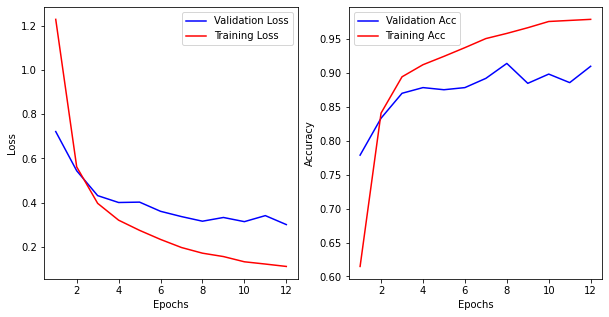

In [36]:
model_val_loss = hist.history['val_loss']
model_train_loss = hist.history['loss']
model_val_acc = hist.history['val_accuracy']
model_train_acc = hist.history['accuracy']

epochs = range(1,13)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, model_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, model_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, model_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [52]:
import cv2
test_image = cv2.imread(project_path + 'Seedling - Prediction/Predict.png')
# Resize the image to 64X64 shape to be compatible with the model
test_image = cv2.resize(test_image,(224,224))

# Check if the size of the Image array is compatible with Keras model
print(test_image.shape)

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1/255.0

#Check the size of the Image array again
print('After expand_dims: '+ str(test_image.shape))


#Predict the result of the test image
result = custom_resnet_model.predict(test_image)

# Index of the class with maximum probability
predicted_index = np.argmax(result[0])

# Print the name of the class
print("The plant species of the sample provided to classify is: ", names[predicted_index])

(224, 224, 3)
After expand_dims: (1, 224, 224, 3)
[1.06294975e-01 9.67363827e-04 1.08575281e-02 7.39935637e-02
 1.08743832e-02 5.81888889e-04 7.74447381e-01 1.68823492e-04
 5.57576772e-03 7.20192969e-04 1.55000370e-02 1.80458301e-05]
The plant species of the sample provided to classify is:  Loose Silky-bent


In [50]:
names[6]

'Loose Silky-bent'

## Try another version, i.e fine tune one layer from the resnet model. In the previous iteration we just added our last layer i.e. the classifier layer and trained the model


In [27]:
model2 = resnet.ResNet50(input_tensor=image_input, include_top=True, weights='imagenet')

last_layer = model2.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output_layer')(x)

custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()

for layer in custom_resnet_model.layers[:-2]:
	layer.trainable = False

custom_resnet_model.layers[-1].trainable, custom_resnet_model.layers[-2].trainable, custom_resnet_model.layers[-3].trainable, 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

(True, True, False)

In [28]:
custom_resnet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_resnet_model.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))

Epoch 1/15
60/60 [==============================] - 66s 545ms/step - loss: 1.4020 - accuracy: 0.5610 - val_loss: 0.8447 - val_accuracy: 0.7516
Epoch 2/15
60/60 [==============================] - 28s 471ms/step - loss: 0.6731 - accuracy: 0.8109 - val_loss: 0.6248 - val_accuracy: 0.8029
Epoch 3/15
60/60 [==============================] - 28s 475ms/step - loss: 0.4950 - accuracy: 0.8689 - val_loss: 0.5237 - val_accuracy: 0.8375
Epoch 4/15
60/60 [==============================] - 28s 475ms/step - loss: 0.4030 - accuracy: 0.8912 - val_loss: 0.4700 - val_accuracy: 0.8585
Epoch 5/15
60/60 [==============================] - 28s 475ms/step - loss: 0.3433 - accuracy: 0.9103 - val_loss: 0.4208 - val_accuracy: 0.8721
Epoch 6/15
60/60 [==============================] - 28s 475ms/step - loss: 0.2951 - accuracy: 0.9279 - val_loss: 0.4075 - val_accuracy: 0.8753
Epoch 7/15
60/60 [==============================] - 28s 475ms/step - loss: 0.2590 - accuracy: 0.9344 - val_loss: 0.3796 - val_accuracy: 0.8784

## Almost same level of accuracy

## Vizualizing Test Predictions

In [30]:
os.listdir(train_path+'/'+train_dir[0])[0], train_dir[0]

('0050f38b3.png', 'Black-grass')

In [31]:
img = image.load_img(os.path.join(train_path+'/'+train_dir[0]+'/'+os.listdir(train_path+'/'+train_dir[0])[0]), target_size=(224,224))
x = image.img_to_array(img)

print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [32]:
x=preprocess_input(x)
x.shape

(1, 224, 224, 3)

In [34]:
features = custom_resnet_model.predict(x)
print( "Actual class is: ",np.argmax(features))

Actual class is:  0


In [35]:
# Index of the class with maximum probability
predicted_index = np.argmax(features[0])

# Print the name of the class
print("The plant species of the sample provided to classify is: ", names[predicted_index])

The plant species of the sample provided to classify is:  Black-grass


In [ ]:
os.listdir(test_path+'/'+'rose')[0], os.listdir(test_path+'/'+'rose')[2],

('17291451621_0e39f08b9e_n.jpg', '18464055536_709c8af0b7_n.jpg')

In [38]:
img = image.load_img(os.path.join(train_path+'/'+train_dir[2]+'/'+os.listdir(train_path+'/'+train_dir[2])[5]), target_size=(224,224))
x = image.img_to_array(img)

print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x=preprocess_input(x)
x.shape

(224, 224, 3)
(1, 224, 224, 3)


(1, 224, 224, 3)

In [43]:
features = custom_resnet_model.predict(x)
print( "Actual class is: ",np.argmax(features))

# Index of the class with maximum probability
predicted_index = np.argmax(features[0])

# Print the name of the class
print("The plant species of the sample provided to classify is: ", names[predicted_index])

Actual class is:  2
The plant species of the sample provided to classify is:  Cleavers


# Class 2 is for Cleavers.Correct Predition .Let's visualize the image and validate

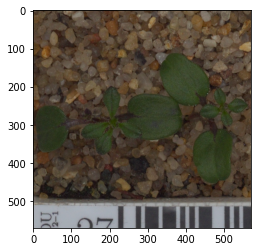

(570, 570, 3)

In [45]:
img = io.imread(train_path+'/'+train_dir[2]+'/'+os.listdir(train_path+'/'+train_dir[2])[5])
plt.imshow(img)
plt.show()
img.shape

## Voila!! Correct prediction.

## Save the model and weights of custom_resnet_model for future use

In [46]:
custom_resnet_model.save(project_path + '/'+ 'Plant_Species_Classification.h5')
custom_resnet_model.save_weights(project_path + '/'+ 'Plant_Species_Classification_weights.h5')

## Load the model and the weights

In [47]:
from tensorflow import keras
model1 = keras.models.load_model(project_path + '/'+ 'Plant_Species_Classification.h5')
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [48]:
#The pre-trained weights must exist in the current folder
model1.load_weights(project_path + '/'+ 'Plant_Species_Classification_weights.h5')

In [49]:
img = image.load_img(os.path.join(project_path+'/'+'Seedling - Prediction'+'/'+'Predict.png'), target_size=(224,224))
x = image.img_to_array(img)

print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x=preprocess_input(x)
x.shape

(224, 224, 3)
(1, 224, 224, 3)


(1, 224, 224, 3)

In [52]:
features = custom_resnet_model.predict(x)
print( "Actual class is: ",np.argmax(features))

# Index of the class with maximum probability
predicted_index = np.argmax(features[0])

# Print the name of the class
print("The plant species of the sample provided to classify is: ", names[predicted_index])

Actual class is:  7
The plant species of the sample provided to classify is:  Maize


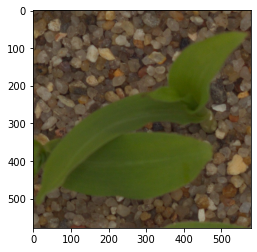

(578, 578, 3)

In [53]:
img = io.imread(os.path.join(project_path+'/'+'Seedling - Prediction'+'/'+'Predict.png'))
plt.imshow(img)
plt.show()
img.shape